In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('../dataset/airline/train.csv')
test = pd.read_csv('../dataset/airline/test.csv')

In [3]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

# column들이 요약되어 표시되지 않게 함.
pd.set_option('display.max_columns', None)

train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [5]:
train.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

### 기초 통계 분석

In [6]:
train.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


### Feature 분포 시각화

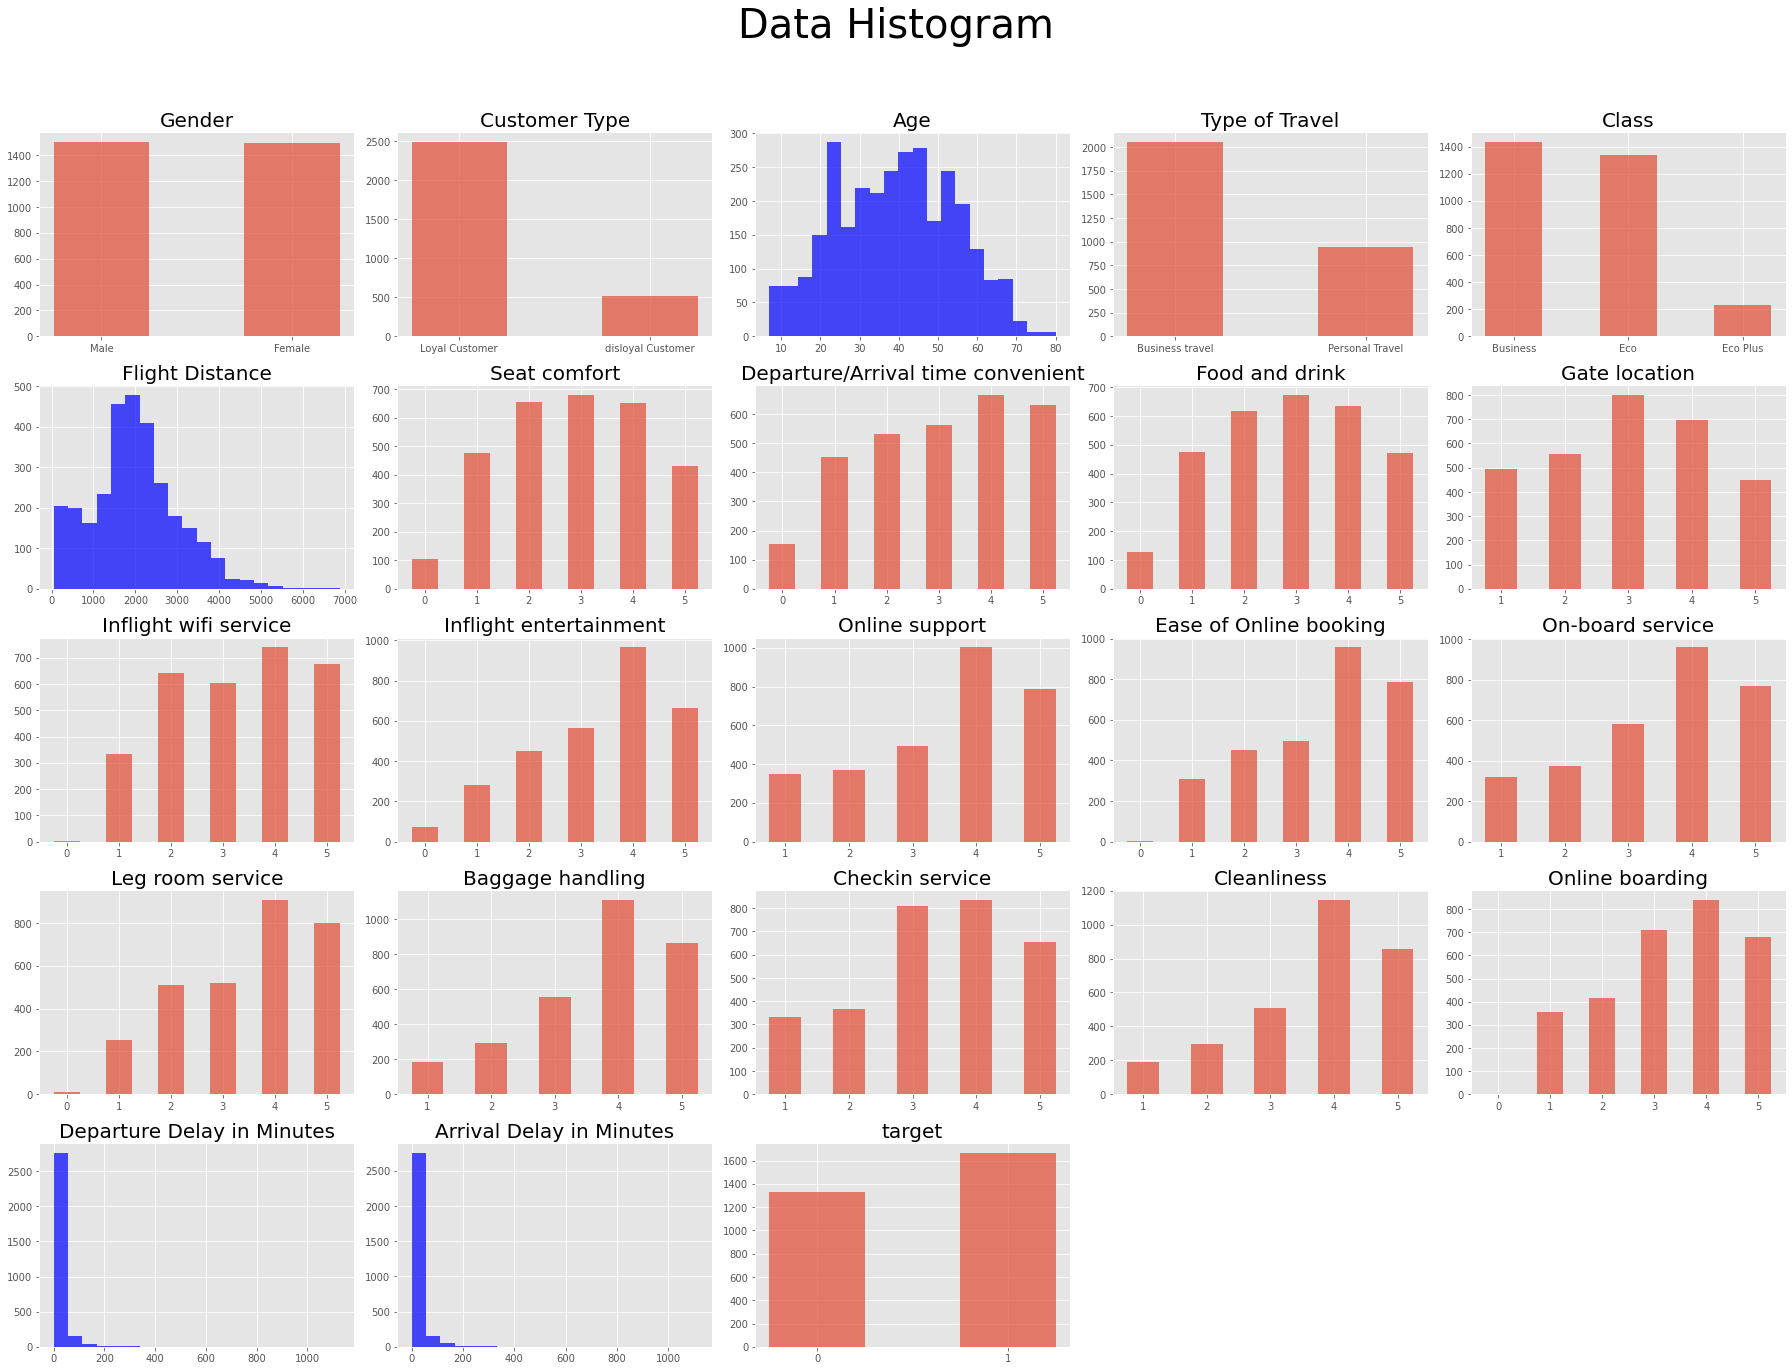

In [7]:
plt.style.use('ggplot')

# histogram 사용. 데이터 분포 살펴보기
plt.figure(figsize=(25, 20))
plt.suptitle('Data Histogram', fontsize=40)

# id는 제외하고 시각화
cols = train.columns

for i in range(len(cols)):
    plt.subplot(5, 5, i+1) # 최대 5 * 5, 25개의 feature 분포를 알 수 있음.
    plt.title(cols[i], fontsize=20) # 제목을 각 특징명으로 설정
    if len(train[cols[i]].unique()) > 20: # 해당 feature의 고유값 종류가 20개가 넘으면
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7) # 히스토그램을 출력. bins=칸을 나누는 값, alpha=투명도
       
    else: # 해당 feature의 고유값 종류가 20개를 넘지 않으면,
        temp = train[cols[i]].value_counts() # 각 특징의 값 종류의 개수들을 temp에 저장.
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 파란 그래프가 아닌 경우 2개 or 5개 값으로 이루어져 있음.
- 파란 그래프는 연속된 값들.
    - age를 제외하고 왼쪽으로 치우쳐져 있음.

### Target과 feature들의 관계 확인

In [8]:
# 타겟 설졍
target = 'target'

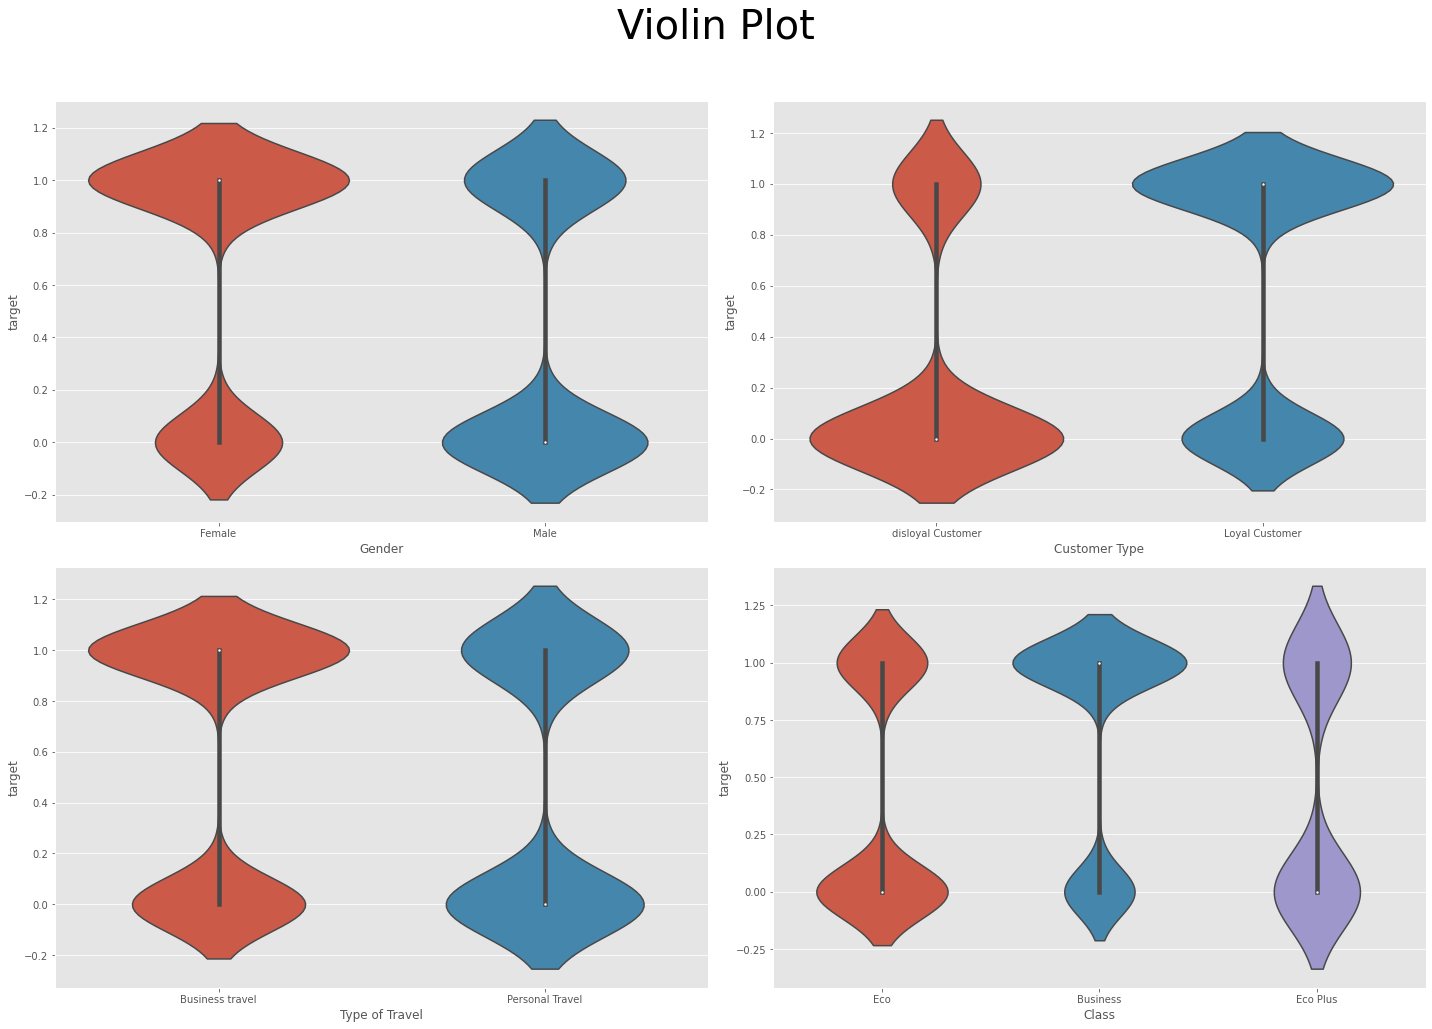

In [9]:
# 범주형 데이터 분리
categorical_feature = train.columns[train.dtypes=='object']

plt.figure(figsize=(20, 15))
plt.suptitle('Violin Plot', fontsize=40)

# id는 제외하고 시각화
for i in range(len(categorical_feature)):
    plt.subplot(2, 2, i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x=train[categorical_feature[i]], y=train[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- target은 0과 1로 이루어져 있음. y축의 0과 1에 집중.
- gender의 경우 1을 준 성별은 여성, 0을 준 성별은 남성이 많음.
- Customer Type의 경우 disloyal과 loyal에 따라 target이 굉장히 차이남.

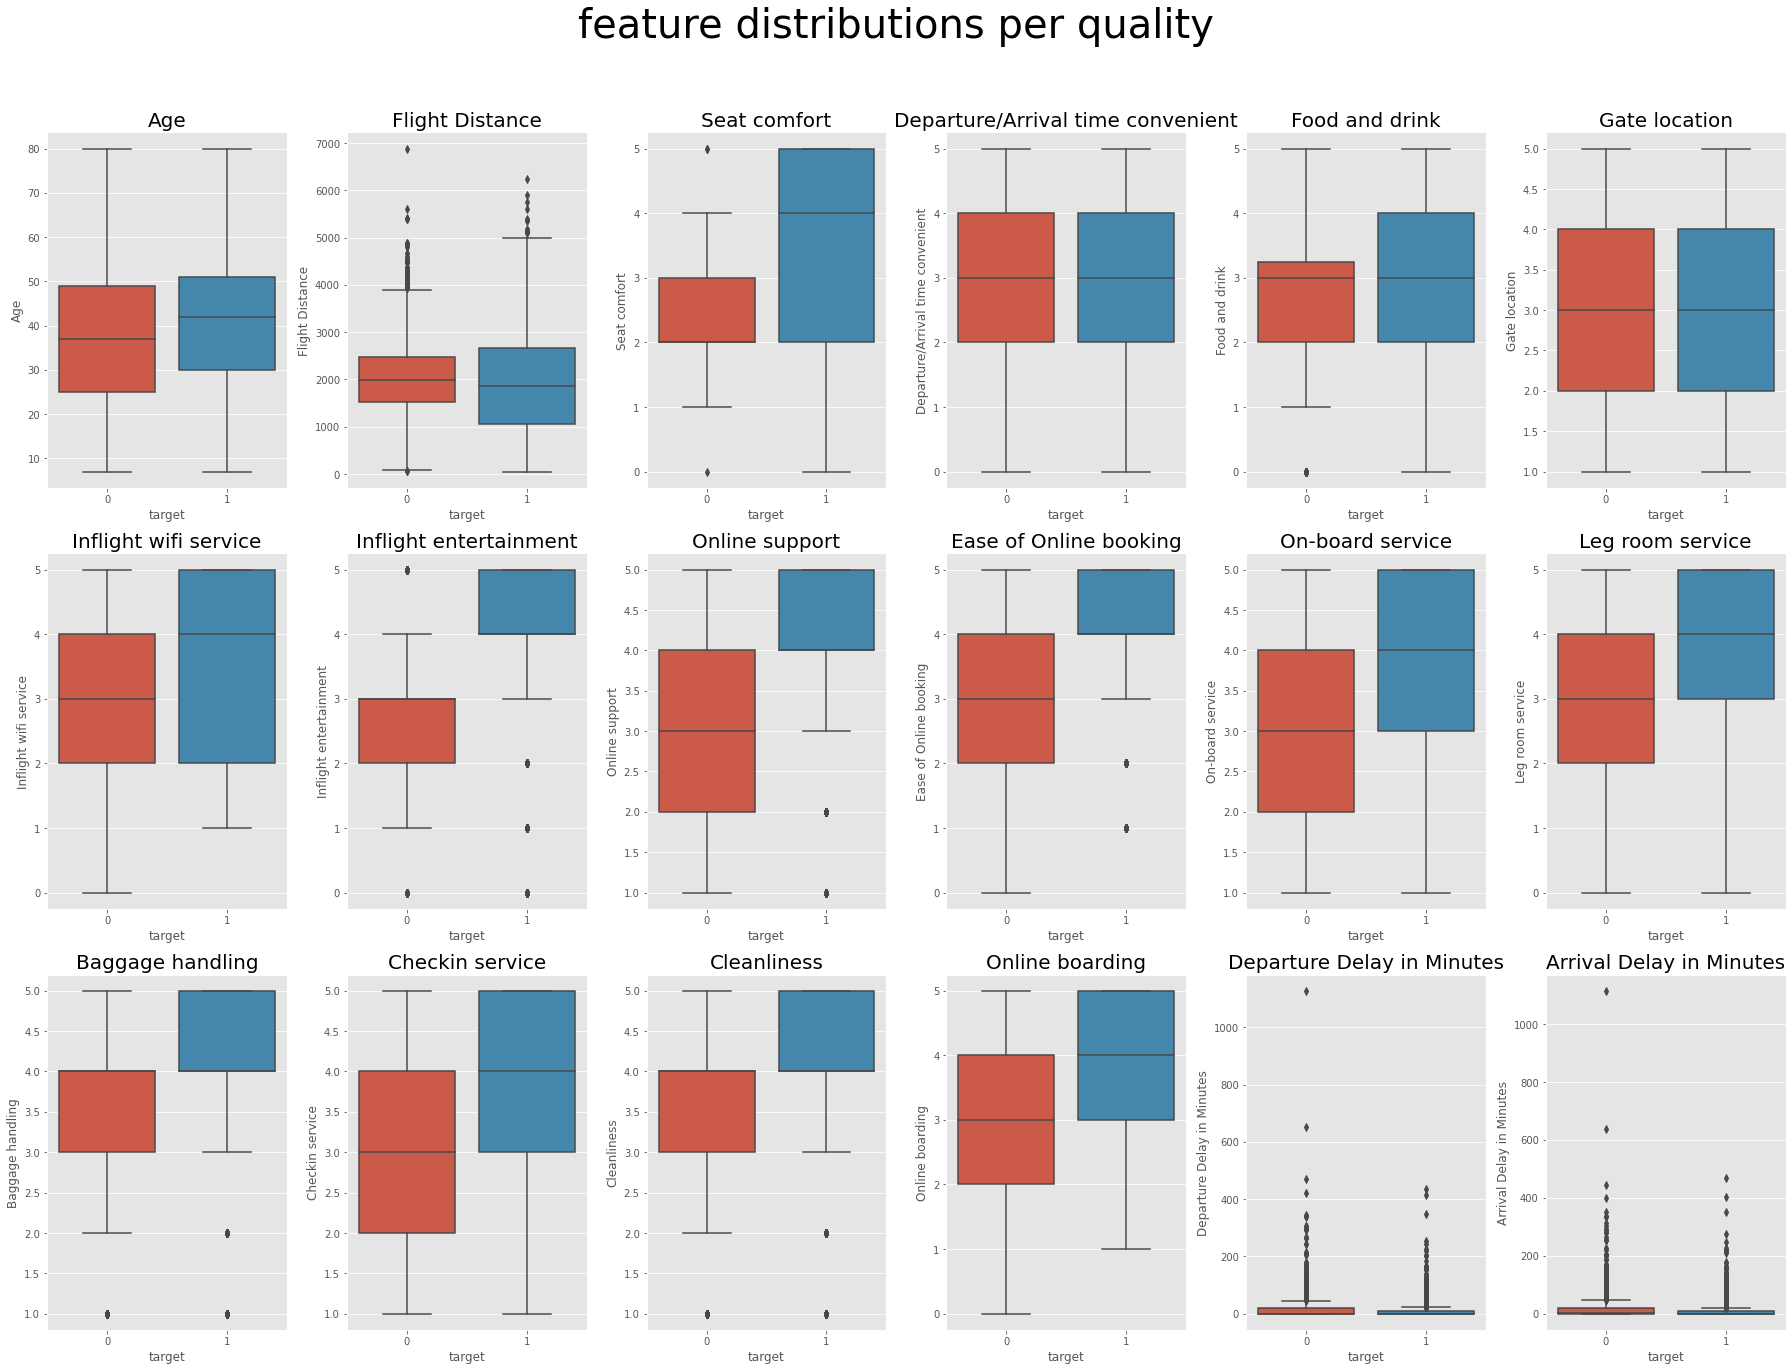

In [10]:
# 수치형 데이터 분리
numeric_feature = train.columns[(train.dtypes=='int64')|(train.dtypes=='float')]
num_data = train[numeric_feature]

# Box plot
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize=40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x='target', y=col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 박스들이 중앙에 있을 수록, 이상치가 없을수록 적합.
    - target이 0이든 1이든 골고루 있다는 것은 그렇게 중요한 특징이 아님.
    - age, Departure/Arrival time convenient, Gate location등이 그렇게 보임.

## 상관계수 확인

### 범주형 데이터 수치화

In [11]:
corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

### heatmap 시각화

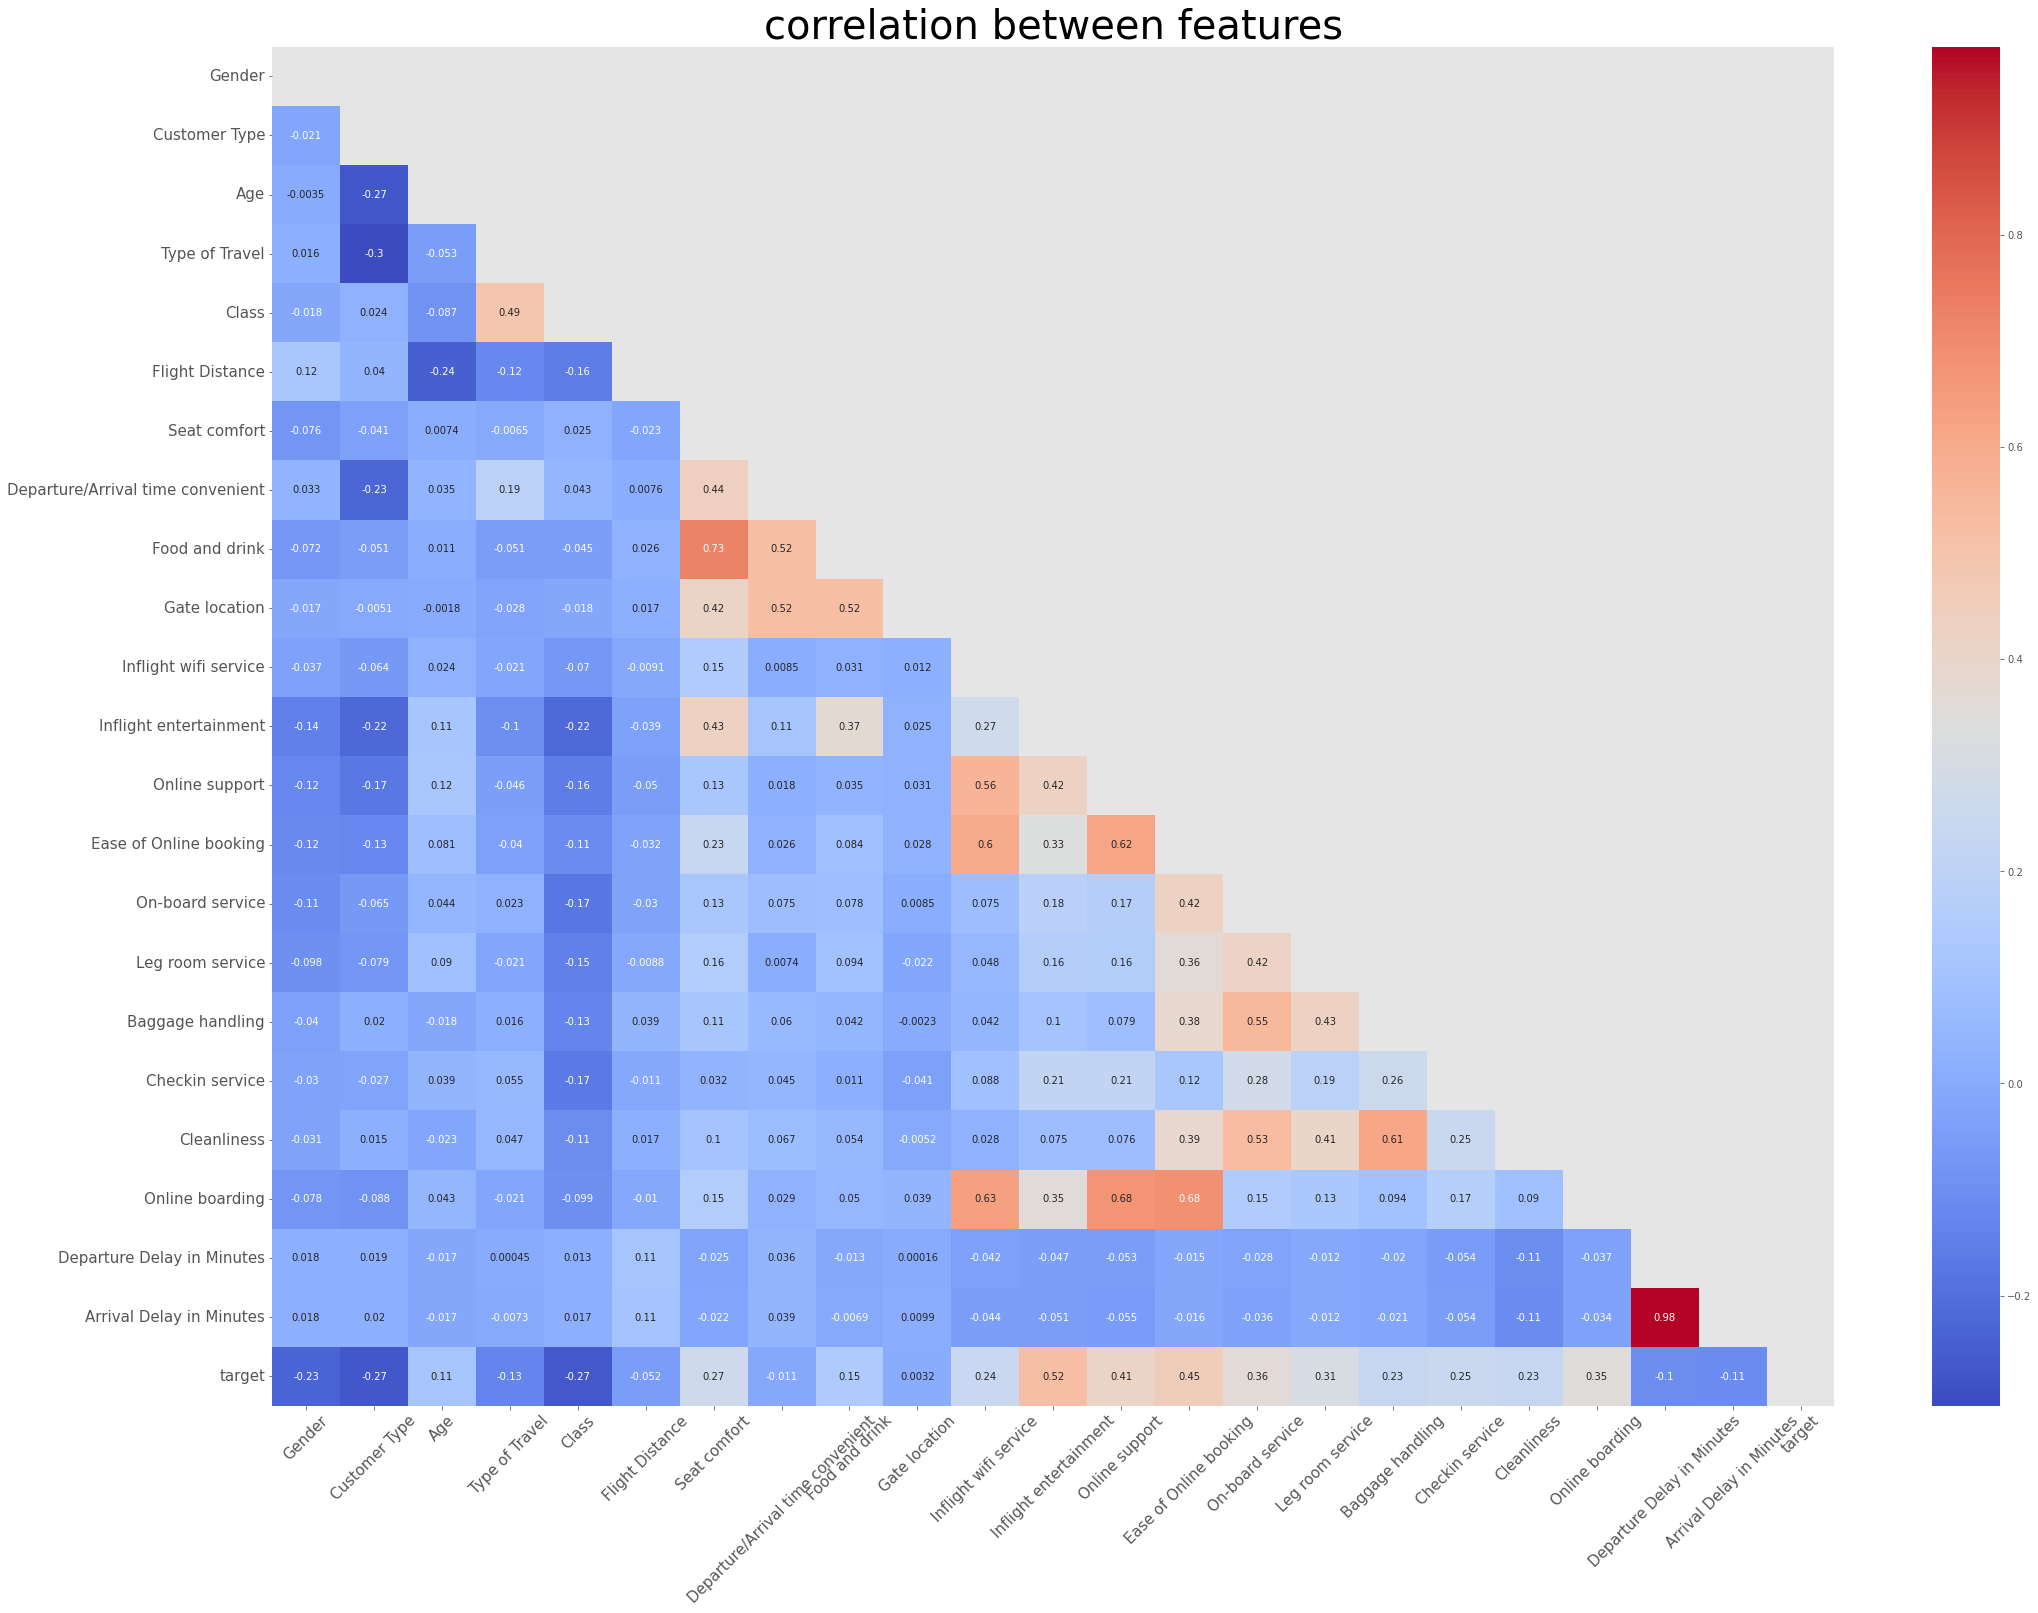

In [12]:
plt.figure(figsize=(35, 25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask=mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

- 상관계수가 0에 가까운 Departure Delay in Minutes, Gate location.
- 위에서 확인한대로 age, Departure/Arrival time convenient, Gate location의 상관계수가 낮음.
- Inflight entertainment와 Online support, Ease of Online booking 등이 높은 상관계수를 가짐.

### 로그 변환

In [13]:
#log 변환 실행

train['Departure Delay in Minutes'] = np.log1p(train['Departure Delay in Minutes'])
train['Arrival Delay in Minutes'] = np.log1p(train['Arrival Delay in Minutes'])

#test 데이터에도 변환 실행

test['Departure Delay in Minutes'] = np.log1p(test['Departure Delay in Minutes'])
test['Arrival Delay in Minutes'] = np.log1p(test['Arrival Delay in Minutes'])

### cf) Departure Delay in Minutes와 Arrival Delay in Minutes에 대해 - 다중공선성

- 다중공선성: 독립변수들이 서로 큰 상관관계를 지니는 상태. (보통 0.7 이상)
    - 출발시간이 지연되면 당연히 도착시간도 지연.
    - 둘의 상관관계는 0.98
- Food and drink & Seat comfort 역시도 다중공선성을 띔.
    - 좌석의 편리함과 음식의 관계.
    - 비싼 좌석일 수록 자리가 편하고 음식도 잘 나옴.
    
- 다중 공선성을 처리하기 위해 둘 중 하나의 특징을 제거.
    - 2개 중 target과의 상관계수가 낮은 특징을 제거.
    - Departure Delay in Minutes & Arrival Delay in Minutes
        - target과의 상관관계: 0.1 / 0.11
        - Departure Delay in Minutes 제거.
    - Food and drink & Seat Comfort
        - target과의 상관관계: 0.15 / 0.27
        - Food and drink 제거.

In [14]:
train.drop('Departure Delay in Minutes', axis=1, inplace=True)
train.drop('Food and drink', axis=1, inplace=True)

test.drop('Departure Delay in Minutes', axis=1, inplace=True)
test.drop('Food and drink', axis=1, inplace=True)

## 이상치 확인

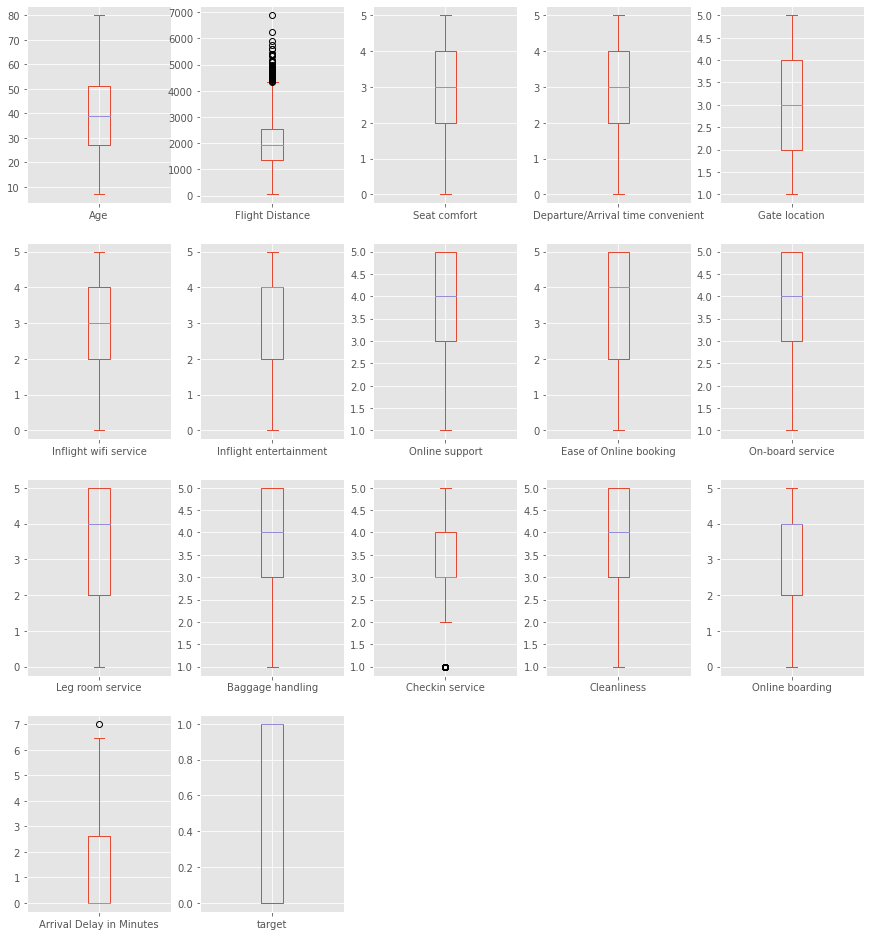

In [15]:
train.plot(kind='box', subplots=True, layout=(5,5), figsize=(15, 21))
plt.show()

- 출발/도착 지연시간과 비행시간에 대한 이상치가 많음.
- 이상치를 처리.
    - 제거할지 평균값으로 대체할지?

In [16]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    # numpy 값을 퍼센트로 표시.
    
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr + 1.5)
    
    return np.where((data > upper_bound)|(data < lower_bound))

In [17]:
ArrivalDelay_index_data = outliers_iqr(train['Arrival Delay in Minutes'])[0]
FlightDistance_index_data = outliers_iqr(train['Flight Distance'])[0]
GarageArea_index_data = outliers_iqr(train['Checkin service'])[0]

In [18]:
ArrivalDelay_index_data

array([2349], dtype=int64)

In [19]:
FlightDistance_index_data

array([  10,   27,   32,   34,   72,   77,   86,  168,  177,  190,  216,
        249,  290,  295,  313,  322,  330,  420,  429,  439,  456,  457,
        468,  508,  517,  529,  541,  565,  570,  576,  583,  618,  621,
        637,  648,  653,  656,  667,  680,  682,  708,  732,  737,  782,
        810,  822,  848,  889,  966,  972, 1008, 1014, 1033, 1061, 1069,
       1094, 1103, 1116, 1120, 1125, 1135, 1161, 1163, 1202, 1213, 1237,
       1262, 1279, 1314, 1343, 1359, 1379, 1395, 1404, 1417, 1435, 1466,
       1485, 1487, 1504, 1506, 1508, 1541, 1545, 1554, 1581, 1586, 1592,
       1618, 1649, 1663, 1670, 1675, 1695, 1701, 1705, 1735, 1737, 1743,
       1749, 1752, 1754, 1760, 1767, 1785, 1809, 1836, 1859, 1903, 1915,
       1924, 1942, 1954, 1970, 2005, 2055, 2061, 2064, 2072, 2081, 2087,
       2115, 2118, 2126, 2130, 2140, 2162, 2176, 2177, 2213, 2215, 2237,
       2254, 2307, 2322, 2353, 2387, 2399, 2415, 2429, 2436, 2449, 2452,
       2511, 2521, 2569, 2571, 2580, 2598, 2602, 26

In [20]:
GarageArea_index_data

array([   1,    6,    7,   16,   26,   33,   39,   61,   66,   78,   99,
        101,  103,  112,  128,  139,  147,  148,  175,  178,  181,  191,
        199,  231,  236,  237,  240,  245,  246,  250,  254,  259,  267,
        275,  280,  302,  308,  310,  322,  329,  339,  354,  364,  368,
        373,  390,  391,  393,  401,  406,  414,  417,  428,  446,  450,
        471,  472,  479,  490,  524,  527,  528,  537,  538,  541,  544,
        549,  556,  560,  568,  574,  577,  586,  590,  599,  618,  624,
        627,  633,  642,  648,  665,  675,  690,  721,  722,  723,  745,
        760,  763,  767,  768,  777,  783,  784,  791,  797,  802,  828,
        848,  857,  858,  869,  871,  907,  919,  928,  931,  946,  953,
        976,  997, 1011, 1023, 1034, 1042, 1053, 1054, 1072, 1095, 1099,
       1103, 1108, 1113, 1116, 1130, 1132, 1134, 1148, 1151, 1164, 1166,
       1194, 1199, 1218, 1224, 1227, 1230, 1233, 1236, 1239, 1251, 1253,
       1259, 1275, 1300, 1315, 1316, 1324, 1342, 13

- 이상치에 해당하는 행이 너무 많아 학습에 지장이 생길 것 같음. (405개)
- 평균값으로 대체.

In [21]:
train.loc[ArrivalDelay_index_data, 'Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].mean()
train.loc[FlightDistance_index_data, 'Flight Distance'] = train['Flight Distance'].mean()
train.loc[GarageArea_index_data, 'Checkin service'] = train['Checkin service'].mean()

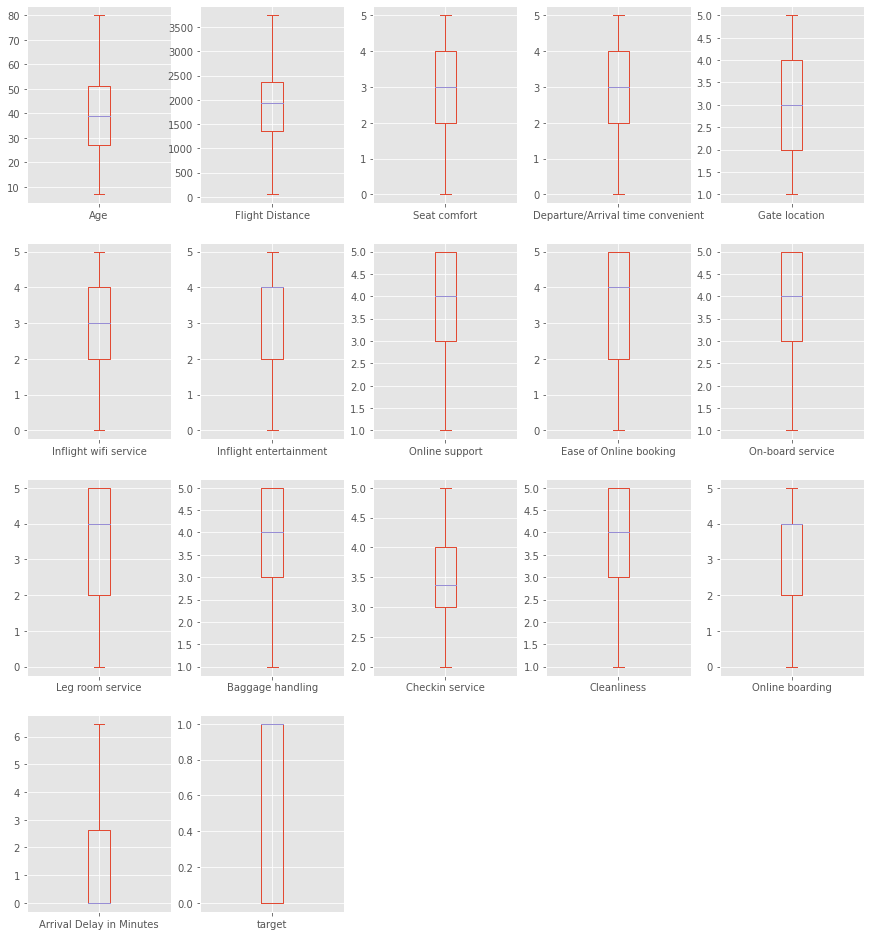

In [22]:
train.plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 21))
plt.show()

- 이상치가 잘 제거된 모습.

In [23]:
# test에도 적용.
ArrivalDelay_index_test = outliers_iqr(test['Arrival Delay in Minutes'])[0]
FlightDistance_index_test = outliers_iqr(test['Flight Distance'])[0]
GarageArea_index_test = outliers_iqr(test['Checkin service'])[0]

test.loc[ArrivalDelay_index_test, 'Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].mean()
test.loc[FlightDistance_index_test, 'Flight Distance'] = test['Flight Distance'].mean()
test.loc[GarageArea_index_test, 'Checkin service'] = test['Checkin service'].mean()

## 데이터 전처리하기

### 낮은 상관계수 특징 제거

- feature가 복잡할 수록 과적합 발생 확률이 증가.

In [24]:
# train
train.drop('Inflight entertainment', axis=1, inplace=True)
train.drop('Online support', axis=1, inplace=True)
train.drop('Ease of Online booking', axis=1, inplace=True)

# test
test.drop('Inflight entertainment', axis=1, inplace=True)
test.drop('Online support', axis=1, inplace=True)
test.drop('Ease of Online booking', axis=1, inplace=True)

In [25]:
print(train.shape, test.shape)

(3000, 18) (2000, 17)


### 범주형 데이터 수치화

In [26]:
# train
train[train.columns[train.dtypes=='O']] = train[train.columns[train.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

# test
test[test.columns[test.dtypes=='O']] = test[test.columns[test.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

In [27]:
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes,target
0,0,1,22,0,1,1599.0,3,0,3,4,5,4,4,4.00,5,4,0.000000,0
1,0,0,37,0,0,2810.0,2,4,4,1,5,4,2,3.37,5,2,2.944439,0
2,1,0,46,0,0,2622.0,1,1,1,4,4,4,4,5.00,4,3,0.000000,1
3,0,1,24,0,1,2348.0,3,3,3,3,2,4,5,3.00,4,3,1.098612,0
4,0,0,58,0,0,105.0,3,3,3,4,4,4,4,4.00,4,5,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,0,30,1,1,2377.0,1,5,1,1,3,5,3,4.00,2,4,5.420535,0
2996,0,1,24,0,1,1643.0,2,4,4,5,2,2,4,3.37,3,5,2.639057,0
2997,0,1,22,0,1,1442.0,2,2,3,4,3,2,3,4.00,3,4,4.219508,0
2998,0,1,33,0,0,2158.0,2,2,5,4,5,2,5,5.00,5,4,1.386294,0


## 모델 학습

- 학습 후 스코어를 확인하고 스케일링을 적용하며 결과를 비교

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [29]:
# 평가 척도
def accuracy(true, pred):
    score = np.mean(true==pred)
    return score

### 데이터 스케일링

- age / flight / Departure Delay in Minutes / Arrival Delay in Minutes 변수들의 범위차이가 큼.
- 이상치 처리를 해주지 않았을 때는 RobustScaler, 이상치 처리를 해주었을 경우엔 MinMaxScale을 사용.
- 과적합 방지를 위해 KFold 사용.

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

scale_feature = [
    'Age',
    'Flight Distance',
    'Arrival Delay in Minutes'
]

def kfold(model, train, scale = False):
    cv_accuracy = []
    cv = StratifiedKFold(n_splits=5)
    
    n_iter = 0
    
    for t, v in cv.split(train, train['target']):
        
        train_cv = train.iloc[t] # train
        val_cv = train.iloc[v] # val
        
        train_X = train_cv.drop('target', axis=1)
        train_y = train_cv['target']
        
        val_X = val_cv.drop('target', axis=1)
        val_y = val_cv['target']
        
        if scale:
            scaler = MinMaxScaler()
            for feature in scale_feature:
                train_X = scaler.fit_transform(train_X)
                val_X = scaler.fit_transform(val_X)
                
        model.fit(train_X, train_y)
        score = accuracy(val_y, model.predict(val_X))
        
        cv_accuracy.append(score)
        n_iter += 1
    return np.mean(cv_accuracy)

In [31]:
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(eval_metric='logloss'),
    LGBMClassifier(),
    CatBoostClassifier(silent = True),
    ExtraTreesClassifier()
]

print('스케일링 적용 전')
for model in models:
    print(f'{type(model).__name__} score: {kfold(model, train)}')

스케일링 적용 전
KNeighborsClassifier score: 0.6003333333333334
LogisticRegression score: 0.8019999999999999
DecisionTreeClassifier score: 0.8793333333333333
RandomForestClassifier score: 0.9143333333333332
GradientBoostingClassifier score: 0.9173333333333333
XGBClassifier score: 0.9286666666666668
LGBMClassifier score: 0.9289999999999999
CatBoostClassifier score: 0.9339999999999999
ExtraTreesClassifier score: 0.9183333333333333


In [32]:
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(), 
    XGBClassifier(eval_metric='logloss'), # eval_metric='logloss' 버전 경고 문구 제거
    LGBMClassifier(),
    CatBoostClassifier(silent = True), # silent = True 학습 내용 출력 제거
    ExtraTreesClassifier()
]

print('스케일링 적용 후')
for model in models:
    print(f'{type(model).__name__} score: {kfold(model, train, True)}')

스케일링 적용 후
KNeighborsClassifier score: 0.8776666666666667
LogisticRegression score: 0.8153333333333332
DecisionTreeClassifier score: 0.8630000000000001
RandomForestClassifier score: 0.907
GradientBoostingClassifier score: 0.9093333333333333
XGBClassifier score: 0.9276666666666668
LGBMClassifier score: 0.916
CatBoostClassifier score: 0.9243333333333332
ExtraTreesClassifier score: 0.9129999999999999


- 스케일링을 적용한 결과 성능이 더욱 떨어짐.

## 모델 앙상블

- 성능이 가장 좋게 나온 3가지의 모델을 앙상블.
    - GradientBoosting, XGB, LGBM
    - 코드공유에서는 RandomForest, XGB, LGBM을 앙상블.
- 그 후 앙상블과 원본의 정확도를 비교.

In [33]:
target = train['target']
train = train.drop('target', axis=1)

In [34]:
# 원본
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train, target, random_state=42)

model_RFC = RandomForestClassifier().fit(train_x, train_y)
model_XGB = XGBClassifier(eval_metric='logloss').fit(train_x, train_y)
model_LGBM = LGBMClassifier().fit(train_x, train_y)
model_CAT = CatBoostClassifier(silent = True).fit(train_x, train_y)
model_EXTRA = ExtraTreesClassifier().fit(train_x, train_y)

pred_RFC = model_RFC.predict(val_x)
pred_XGB = model_XGB.predict(val_x)
pred_LGBM = model_LGBM.predict(val_x)
pred_CAT = model_CAT.predict(val_x)
pred_EXTRA = model_EXTRA.predict(val_x)

print('RFC:', accuracy(val_y, pred_RFC))
print('XGB:', accuracy(val_y, pred_XGB))
print('LGBM:', accuracy(val_y, pred_LGBM))
print('CAT:', accuracy(val_y, pred_CAT))
print('EXTRA:', accuracy(val_y, pred_EXTRA))

RFC: 0.924
XGB: 0.9266666666666666
LGBM: 0.928
CAT: 0.9373333333333334
EXTRA: 0.9226666666666666


In [35]:
# 앙상블
predict = np.zeros(pred_RFC.shape)
predict = (pred_LGBM + pred_XGB + pred_CAT + pred_RFC + pred_EXTRA) / 5
predict[predict > 0.5] = 1
predict[predict < 0.5] = 0
predict

accuracy(val_y, predict)

0.932

- 과반수기법인 HardVoting 기법을 사용하여 앙상블을 진행.

## 모델 튜닝

- gridSearchCV를 통해 최적의 하이퍼 파라미터를 탐색.

In [36]:
from sklearn.model_selection import KFold, GridSearchCV

### RandomForest

In [37]:
model_RFC = RandomForestClassifier()

params = {'n_estimators' : [10, 100, 1000],
          'max_depth' : [6, 8, 10, 12],
          'min_samples_leaf' : [8, 12, 18],
          'min_samples_split' : [8, 16, 20]
         }

grid_cv_RFC = GridSearchCV(model_RFC, param_grid = params, cv=5, n_jobs = -1)
grid_cv_RFC.fit(train, target) # train과 target은 위에 train_test_split하기 전에 있었음
print('최적 하이퍼 파라미터: ', grid_cv_RFC.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_RFC.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 1000}
최고 예측 정확도: 0.9007


### XGBClassifier

In [38]:
model_XGB = XGBClassifier(eval_metric='logloss', silent = True)

param_grid={'booster' :['gbtree'],
            'silent':[True],
            'max_depth':[5,6,8],
            'min_child_weight':[1,3,5],
            'gamma':[0,1,2,3],
            'nthread':[4],
            'colsample_bytree':[0.5,0.8],
            'colsample_bylevel':[0.9],
            'n_estimators':[50],
            'objective':['binary:logistic'],
            'random_state':[2]
           }

grid_cv_XGB=GridSearchCV(model_XGB, param_grid=param_grid, cv=5 , n_jobs=-1)
grid_cv_XGB.fit(train, target)
print('최적 하이퍼 파라미터: ', grid_cv_XGB.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_XGB.best_score_))

[15:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


최적 하이퍼 파라미터:  {'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bytree': 0.8, 'gamma': 3, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'random_state': 2, 'silent': True}
최고 예측 정확도: 0.9330


### LGBMClassifier

In [39]:
model_LGBM = LGBMClassifier()

gridParams = {'learning_rate': [0.005, 0.01],
              'n_estimators': [100, 500, 1000],
              'num_leaves': [12, 16, 20], # large num_leaves helps improve accuracy but might lead to over-fitting
              'boosting_type' : ['dart'], # for better accuracy -> try dart
              'objective' : ['binary'],
              'max_bin':[300, 600], # large max_bin helps improve accuracy but might slow down training progress
             }

grid_cv_LGBM = GridSearchCV(model_LGBM, param_grid=gridParams, cv=3 , n_jobs=-1)
grid_cv_LGBM.fit(train, target)
print('최적 하이퍼 파라미터: ', grid_cv_LGBM.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_LGBM.best_score_))

최적 하이퍼 파라미터:  {'boosting_type': 'dart', 'learning_rate': 0.01, 'max_bin': 300, 'n_estimators': 1000, 'num_leaves': 20, 'objective': 'binary'}
최고 예측 정확도: 0.9187


### CatBoostClassifier

In [40]:
model_CAT = CatBoostClassifier(silent = True)

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_cv_CAT = GridSearchCV(model_CAT, param_grid=grid, cv=3 , n_jobs=-1)
grid_cv_CAT.fit(train, target)
print('최적 하이퍼 파라미터: ', grid_cv_CAT.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_CAT.best_score_))

최적 하이퍼 파라미터:  {'depth': 10, 'l2_leaf_reg': 7, 'learning_rate': 0.03}
최고 예측 정확도: 0.9343


In [41]:
# 최적 하이퍼 파라메터로 설정, 학습된 모델 저장
best_model_XGB = grid_cv_XGB.best_estimator_
best_model_RFC = grid_cv_RFC.best_estimator_ 
best_model_LGBM = grid_cv_RFC.best_estimator_ 
best_model_CAT = grid_cv_CAT.best_estimator_
best_model_EXTRA = ExtraTreesClassifier(n_estimators = 1000).fit(train, target)

## Submission

In [42]:
pred_XGB = best_model_XGB.predict(test)
pred_RFC = best_model_RFC.predict(test)
pred_LGBM = best_model_LGBM.predict(test)
pred_CAT = best_model_CAT.predict(test)
pred_EXTRA = best_model_EXTRA.predict(test)
predict = ( pred_XGB + pred_LGBM + pred_CAT) / 3 # Hard voting
predict[predict > 0.5] = 1
predict[predict < 0.5] = 0

In [43]:
submission = pd.read_csv('../dataset/airline/submission.csv')
submission

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
1995,1996,0
1996,1997,0
1997,1998,0
1998,1999,0


In [44]:
submission['target'] = predict.astype('int8')
submission

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,1


In [45]:
submission.to_csv('11. GridSearchCV+Log.csv', index=False)